# Step 6. Output the results

Here we output the results for our work

## 0.Preparation

In [1]:
import pandas as pd
import json
import os
import random
from PIL import Image

## 1. Representation of class and functions

### 1.1. Dataset class: it is responsible for all operations with dataset

In [2]:
class Dataset:
    def __init__(self):
        pass
    
    def json_file_opening(self, json_file, attr_1, attr_2, dictionary=False, reshaping=False, tensor=False):
        with open(json_file, 'r') as file:
            img_features = [(json.loads(line)[attr_1],
                 json.loads(line)[attr_2])
                  for line in file]
        img_list = [feature[0] for feature in img_features]
        feature_list = [feature[1] for feature in img_features]
        if dictionary == False:
            return img_list, feature_list
        else:
            dict_list = {}
            assert len(img_list) == len(feature_list)
            for i in range(len(img_list)):
                if reshaping == True:
                    dict_list[img_list[i]] = np.array(feature_list[i]).reshape(1, -1)
                elif tensor == True:
                    dict_list[img_list[i]] = torch.FloatTensor(feature_list[i]).unsqueeze(dim=0)
                else:
                    dict_list[img_list[i]] = feature_list[i]
            return dict_list
    
    def image_table_constucting(self, image, model, clip, bert):
        self.image_model_list = model.get(image)
        self.image_clip_list = clip.get(image)
        self.image_bert_list = bert.get(image)
        self.image_model_list.insert(0, image)
        self.image_clip_list.insert(0, image)
        self.image_bert_list.insert(0, image)
        unify_img_list = [*self.image_model_list, *self.image_clip_list, *self.image_bert_list]
        return unify_img_list
    
    def text_table_constructing(self, image_texts):
        image_model_text = [image_texts.get(img) for img in self.image_model_list]
        image_clip_text = [image_texts.get(img) for img in self.image_clip_list]
        image_bert_text = [image_texts.get(img) for img in self.image_bert_list]
        data = [image_model_text, image_clip_text, image_bert_text]
        text_data = pd.DataFrame(data, columns=['image',
                                        'candidate_1',
                                        'candidate_2',
                                        'candidate_3',
                                        'candidate_4',
                                        'candidate_5'],
                                index=['model',
                                       'CLIP',
                                       'BERT'])
        return text_data
        

### 1.2. Analytics class: it is responsible for all analytics

In [3]:
class ImageRepresentation:
    def __init__(self):
        pass
    
    def images_single(self, image_list):
        n = len(image_list)
        count = 1
        plt.figure(figsize=(60, 30))
        for i in range(n):
            image = Image.open(f'{dir_path}/{image_list[i]}')
            plt.subplot((n // 6) + (n % 6), 6, count), plt.imshow(image)
            count +=1
        plt.show()

## 2. Dataset preparation and representation

In [5]:
dataset = Dataset()
candidates_clip_cossim = dataset.json_file_opening('05_image_candidates_5_clip_cossim.json',
                                                   'img', 'candidates',
                                                   dictionary=True,
                                                   reshaping=False,
                                                   tensor=False)
candidates_bert_cossim = dataset.json_file_opening('05_image_candidates_5_bert_cossim.json', 
                                                   'img', 'candidates',
                                                   dictionary=True,
                                                   reshaping=False,
                                                   tensor=False)
candidates_model = dataset.json_file_opening('05_image_model_candidates_5.json',
                                             'img', 'candidates',
                                                   dictionary=True,
                                                   reshaping=False,
                                                   tensor=False)
image_texts = dataset.json_file_opening('image_text_dataset.json', 
                                               'img', 'txt',
                                               dictionary=True, 
                                               reshaping=False, 
                                               tensor=False)

FileNotFoundError: [Errno 2] No such file or directory: 'image_text_dataset.json'

In [26]:
represent = ImageRepresentation()

## 4. Experiments

### 4.1. Experiment 1

Images

img_200811_1.jpg


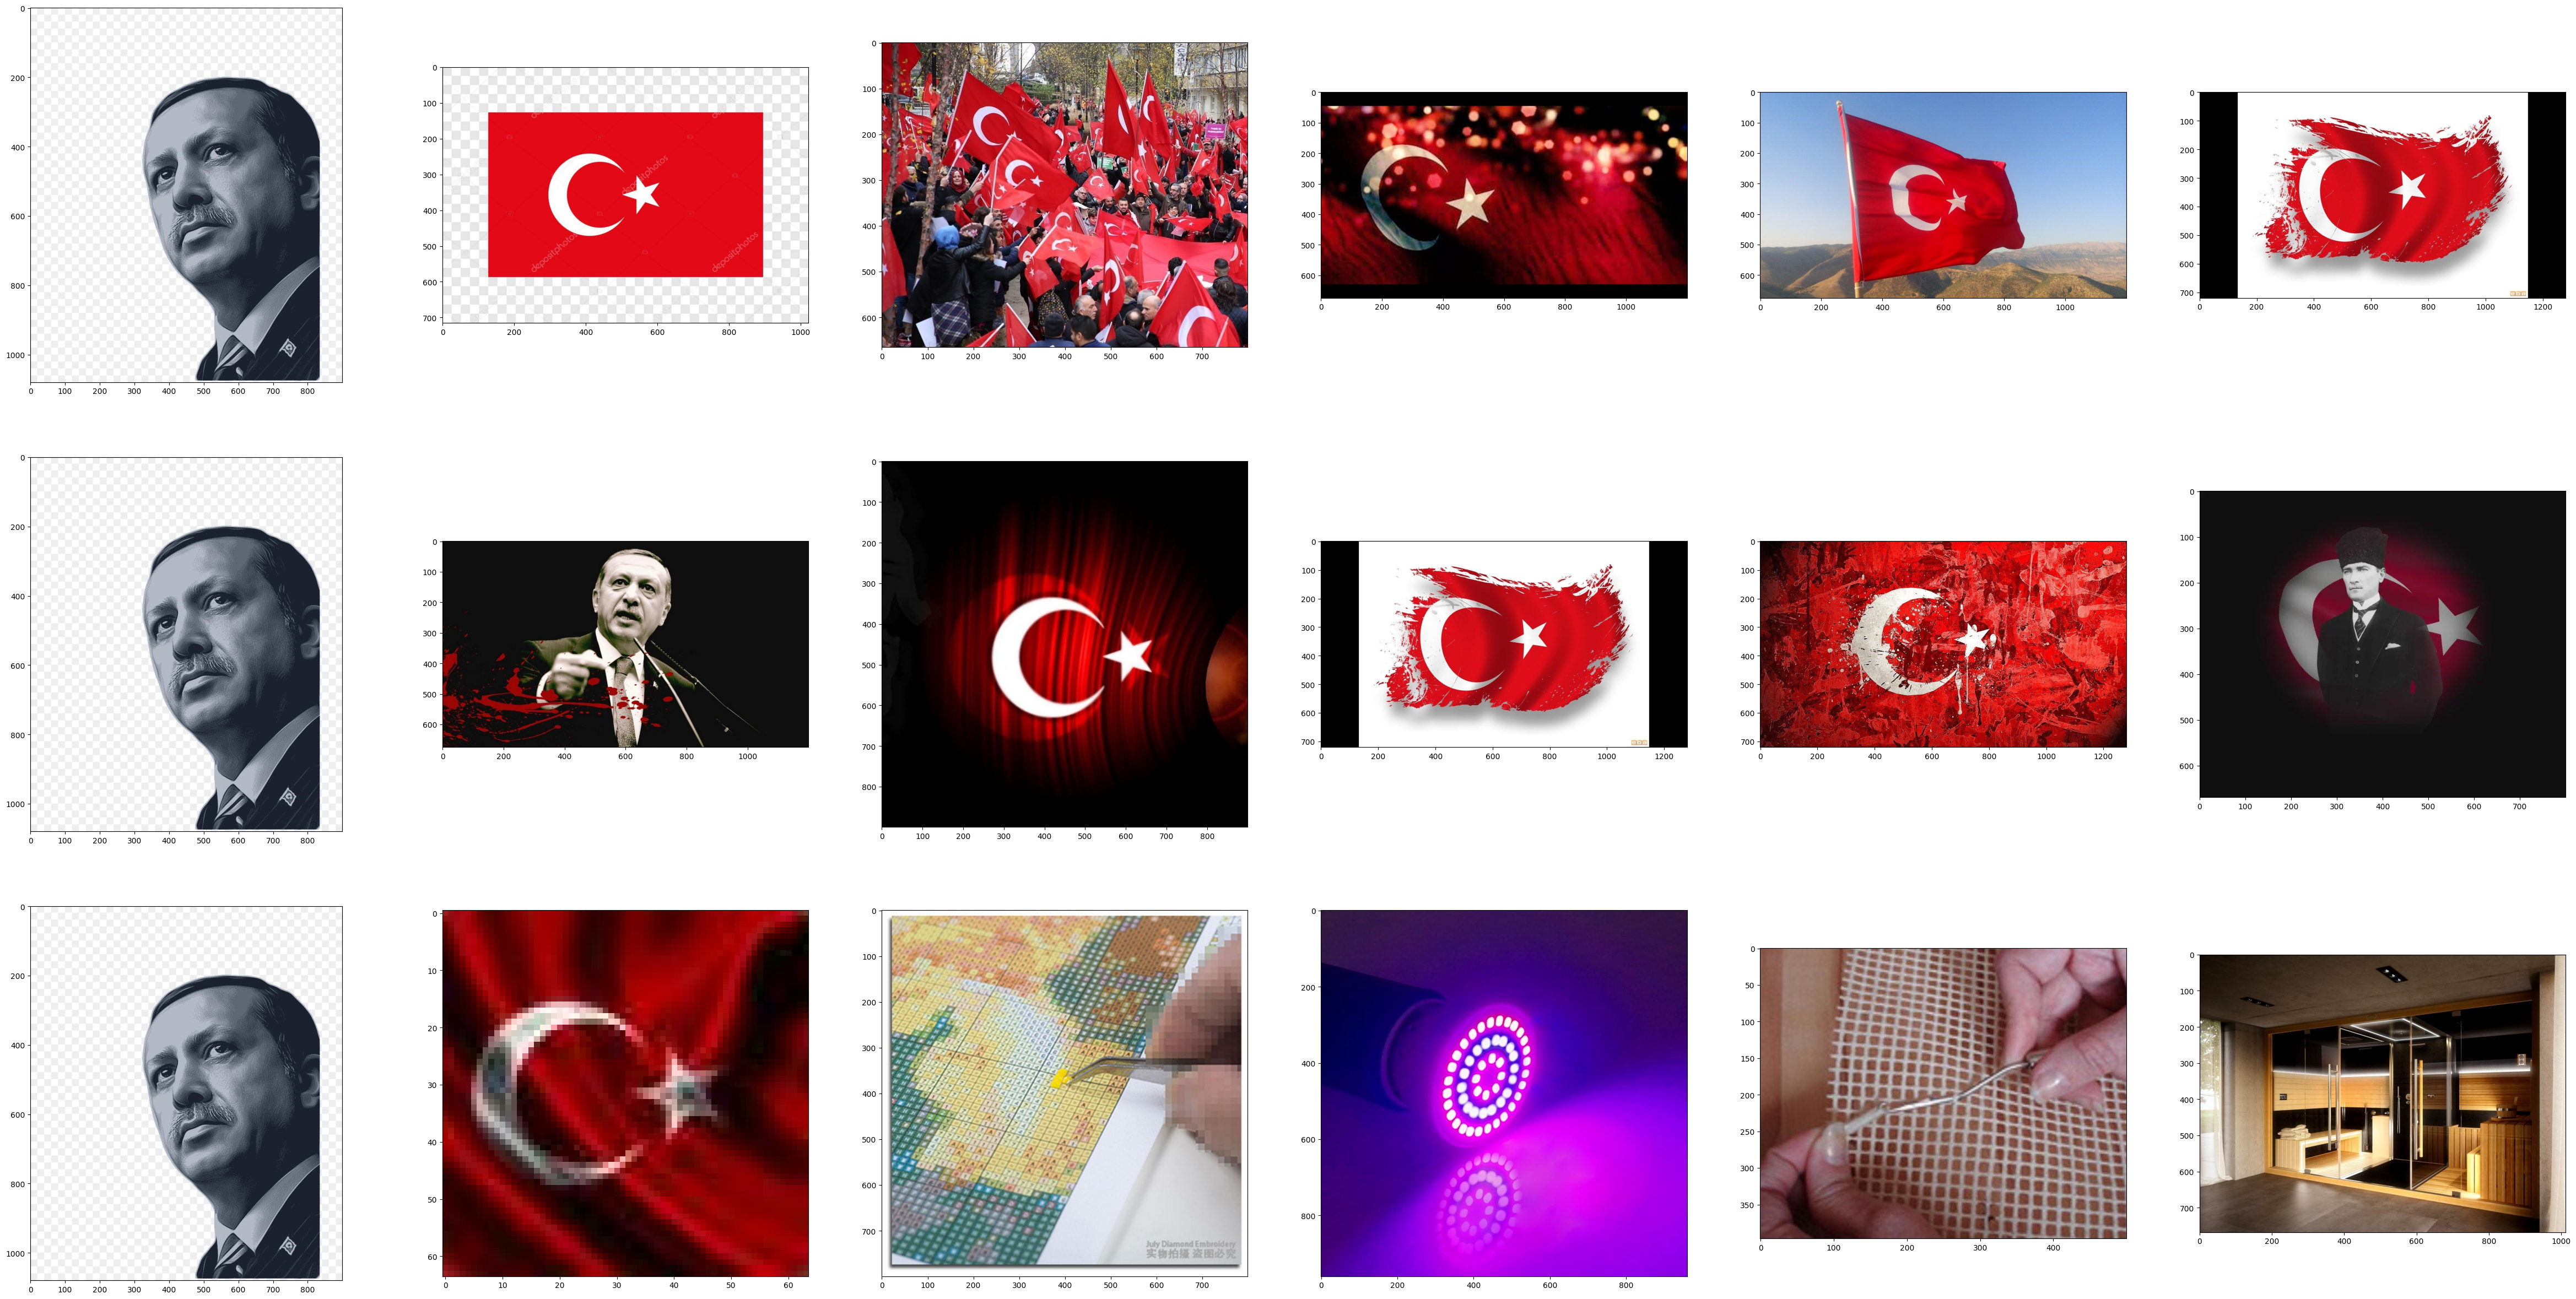

In [36]:
random_image = random.choice(list(candidates_bert_cossim.keys()))
print(random_image)
represent.images_single(dataset.image_table_constucting(random_image,
                                                        candidates_model,
                                                        candidates_clip_cossim,
                                                        candidates_bert_cossim))

Texts

In [37]:
dataset.text_table_constructing(image_texts)

image   
model  Реджеп Тайип Эрдоган Рейс Стамбульская партия ...  \
CLIP   Реджеп Тайип Эрдоган Рейс Стамбульская партия ...   
BERT   Реджеп Тайип Эрдоган Рейс Стамбульская партия ...   

                                             candidate_1   
model  Шелковые футбольные флаги для болельщиков флаг...  \
CLIP           Запад объявляет Эрдогану войну Fishki.net   
BERT   nappe et napperon - grille 1/4 (voir ouvrages ...   

                                             candidate_2   
model               PKK=PYD=YPG=DEAŞ=FETÖ" - MEDYAGÜNDEM  \
CLIP   Cep Telefonu Türk Bayrağı Duvar Kağıtları Türk...   
BERT   5D DIY алмаз вышивка цветы пиона, бисером Набо...   

                                             candidate_3   
model  Hülya Özmolla adlı kullanıcının güzel sözler p...  \
CLIP   Kırmızı Beyaz Şanlı Türk Bayrakları Wallpapers...   
BERT   Светодио дный светать полный спектр Fitolampy ...   

                                             candidate_4   
model                             20 Türk Bayrağı Resimi  \
CLIP      Turki Flag Wallpaper APK untuk Unduhan Android   
BERT   Поделки и идеи для дома Записи в рубрике Подел...   

                                             candidate_5  
model  Kırmızı Beyaz Şanlı Türk Bayrakları Wallpapers...  
CLIP   ΑΠΟΚΛΕΙΣΤΙΚΟ LABEL NEWS: Προκαλεί μέσω social ...  
BERT   Jacuzzi Sasha 2.0 Комплекс: Сауна+Hammam+Душ 4...